In [34]:
# !pip install pandas pyplot scikit-learn matplotlib ipywidgets ipykernel seaborn

import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

# ML
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

### Carregamento dos dados

In [3]:
# Carregar o Dataframe

df_housing = pd.read_csv('./Datasets/housing.csv')

In [4]:
# Analisar a estrutura

df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Visualizando os primeiros resultados

df_housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [7]:
# Visualizando os últimos resultados

df_housing.tail(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
535,2100000,3360,2,1,1,yes,no,no,no,no,1,no,unfurnished
536,1960000,3420,5,1,2,no,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
538,1890000,3649,2,1,1,yes,no,no,no,no,0,no,unfurnished
539,1855000,2990,2,1,1,no,no,no,no,no,1,no,unfurnished
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### EDA

### Análise Univariada

In [ ]:
# Estatísticas das variáveis

df_housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
# Distribuição da variável mainroad

percentual_mainroad = df_housing.value_counts('mainroad') / len(df_housing) * 100
px.bar(percentual_mainroad, color=percentual_mainroad.index, title="Mainroad(Rua Principal)")

In [30]:
# Distribuição da variável furnishingstatus

percentual_furnishingstatus = df_housing.value_counts('furnishingstatus') / len(df_housing) * 100
px.bar(percentual_furnishingstatus, color=percentual_furnishingstatus.index, title="Furnishingstatus(Estado Mobília)")

In [14]:
# Distribuição da variável price

px.histogram(df_housing['price'], title='histograma da variável Price(Preço)')

### Analise Bivariada

In [24]:
# Plot de Distribuição (BoxPlot) por price e area

px.box(df_housing, x='price', y='area', color='area', orientation='h')

In [25]:
# Plot de Distribuição (BoxPlot) por price e bedrooms

px.box(df_housing, x='price', y='bedrooms', color='bedrooms', orientation='h')

In [26]:
# Plot de Distribuição (BoxPlot) por price e bathrooms

px.box(df_housing, x='price', y='bathrooms', color='bathrooms', orientation='h')

In [27]:
# Plot de Distribuição (BoxPlot) por price e stories

px.box(df_housing, x='price', y='stories', color='stories', orientation='h')

In [28]:
# Plot de Distribuição (BoxPlot) por price e parking

px.box(df_housing, x='price', y='parking', color='parking', orientation='h')

In [29]:
# Plot de Distribuição (BoxPlot) por price e furnishingstatus

px.box(df_housing, x='price', y='furnishingstatus', color='furnishingstatus', orientation='h')

In [31]:
# Gerar Matriz de correlação

matriz_correlacao_housing = df_housing.corr(numeric_only=True)

<Axes: >

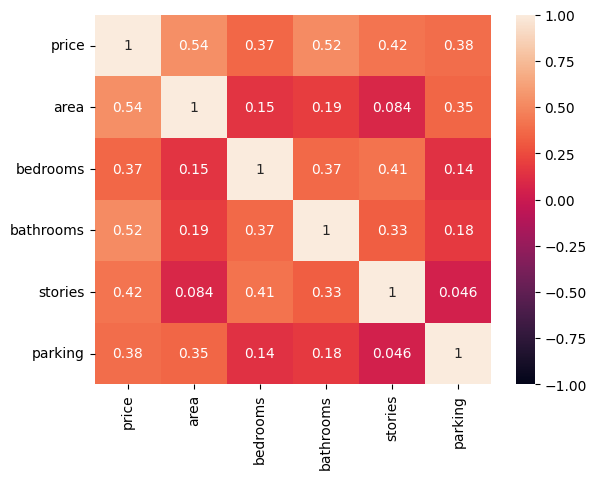

In [32]:
# Plotar Matriz de Correlação

sns.heatmap(matriz_correlacao_housing, vmin=-1, vmax=1, annot=True)

### Treinar o algoritmo PCA

In [ ]:
# Selecionar as colunas para PCA
X = df_housing.copy()

In [35]:
# Separar variáveis

numeric_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Definir transformações
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [36]:
# Criar Pre Processador de Transformações

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Transformar os dados
X_transformed = preprocessor.fit_transform(X)

# Visualizar o X_transformed
X_transformed

array([[ 4.56636513,  1.04672629,  1.40341936, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.00448405,  1.75700953,  1.40341936, ...,  1.        ,
         0.        ,  0.        ],
       [ 4.00448405,  2.21823241,  0.04727831, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, ...,  0.        ,
         0.        ,  1.        ],
       [-1.61432675, -1.03338891,  0.04727831, ...,  1.        ,
         0.        ,  0.        ],
       [-1.61432675, -0.5998394 ,  0.04727831, ...,  0.        ,
         0.        ,  1.        ]], shape=(545, 21))

In [37]:
# Matriz de Covariância

np.cov(X_transformed)

array([[ 1.05672366,  1.08502975,  0.7480314 , ..., -0.50960856,
        -0.47648989, -0.44358247],
       [ 1.08502975,  2.08301106,  0.79633869, ..., -0.66968499,
        -0.66398848, -0.57348981],
       [ 0.7480314 ,  0.79633869,  0.97366726, ..., -0.35841653,
        -0.48178103, -0.4328597 ],
       ...,
       [-0.50960856, -0.66968499, -0.35841653, ...,  0.68007692,
         0.50027532,  0.52732832],
       [-0.47648989, -0.66398848, -0.48178103, ...,  0.50027532,
         0.61527198,  0.4313385 ],
       [-0.44358247, -0.57348981, -0.4328597 , ...,  0.52732832,
         0.4313385 ,  0.5173675 ]], shape=(545, 545))

In [38]:
# Criar modelo PCA

modelo_pca = PCA(n_components=3)

In [39]:
# Executar PCA

X_pca = modelo_pca.fit_transform(X_transformed)

# Gerar um dataframe com base nos componentes principais
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Visualizar componentes principais
df_pca.head(10)

,PC1,PC2,PC3
0,5.177842,-0.254557,0.528611
1,7.355559,0.584288,-0.644957
2,4.187954,-2.017952,-0.535012
3,4.914181,-1.509685,-0.744537
4,3.474818,-1.261811,0.084076
5,4.037733,-1.506833,-2.282963
6,5.626973,0.760700,0.165465
7,5.401703,-0.284467,-0.863154
8,3.291962,-1.475582,0.087136
9,3.410714,0.953872,1.083921


In [ ]:
# Verificar tamanho do Dataframe original
len(df_housing)

545

In [ ]:
# Verificar tamanho do Dataframe de PCA
len(df_pca)

545

In [43]:
# Incluir componentes principais no dataframe original

df_housing['PC1'] = df_pca['PC1']
df_housing['PC2'] = df_pca['PC2']
df_housing['PC3'] = df_pca['PC3']

In [45]:
# Mostrar o dataframe original, pós inclusão das colunas de PCA

df_housing.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,PC1,PC2,PC3
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,5.177842,-0.254557,0.528611
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,7.355559,0.584288,-0.644957
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,4.187954,-2.017952,-0.535012
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,4.914181,-1.509685,-0.744537
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3.474818,-1.261811,0.084076
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,4.037733,-1.506833,-2.282963
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,5.626973,0.760700,0.165465
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,5.401703,-0.284467,-0.863154
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,3.291962,-1.475582,0.087136
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,3.410714,0.953872,1.083921


### Visualizar Resultados

In [46]:
# Autovalores

autovetores = modelo_pca.explained_variance_

# Autovetores
autovalores = modelo_pca.components_

print("Autovetores:")
print(autovetores)
print("\nAutovalores:")
print(autovalores)

Autovetores:
[2.72466849 1.2527826  0.73926974]

Autovalores:
[[ 5.36753100e-01  3.64911514e-01  3.63683694e-01  4.05214489e-01
   3.45870590e-01  3.02747866e-01 -5.91657012e-02  5.91657012e-02
  -5.46232030e-02  5.46232030e-02 -4.09396062e-02  4.09396062e-02
  -7.95947051e-03  7.95947051e-03 -1.28906936e-01  1.28906936e-01
  -7.25150601e-02  7.25150601e-02  6.39124659e-02  1.63289778e-02
  -8.02414438e-02]
 [-1.10437824e-01 -4.87758310e-01  3.98264522e-01  2.35256539e-01
   5.14471037e-01 -4.81552392e-01  7.84077277e-02 -7.84077277e-02
   3.01499671e-02 -3.01499671e-02  7.41119021e-02 -7.41119021e-02
  -1.55029741e-03  1.55029741e-03  3.17787474e-05 -3.17787474e-05
   7.59026448e-02 -7.59026448e-02 -3.36990591e-02 -5.87151332e-03
   3.95705724e-02]
 [ 1.64401386e-02  2.24604728e-01 -2.32051687e-01 -5.25432057e-01
   5.80590949e-01  3.93656933e-02 -7.92126271e-02  7.92126271e-02
   1.05390188e-01 -1.05390188e-01  3.23866036e-01 -3.23866036e-01
   1.61826825e-02 -1.61826825e-02 -1.17876

In [47]:
# Mostrar Chart 3D com os componentes principais
fig = px.scatter_3d(df_housing, x='PC1', y='PC2', z='PC3', color='price', title='Visualização PCA', width=800, height=600, hover_data=['price'])
fig.show()

In [48]:
px.scatter(df_housing, x='PC1', y='PC2', color='price', hover_data=['price'])

In [54]:
# Reconstruir os dados com base no PCA

X_recovered = modelo_pca.inverse_transform(X_pca)

# Visualizar Recovered
X_recovered
# X_recovered.shape[0] -> 545
# X_recovered.shape[1] -> 21

array([[ 2.81602587,  2.13234519,  1.65905033, ...,  0.60481067,
         0.46930908, -0.07411976],
       [ 3.87298853,  2.25427653,  3.0574615 , ...,  0.69702589,
         0.57375786, -0.27078375],
       [ 2.46195992,  2.39233928,  0.84356242, ...,  0.58402135,
         0.530398  , -0.11441935],
       ...,
       [-1.39288316, -0.87474599, -1.02635277, ...,  0.09504846,
         0.36634579,  0.53860575],
       [-1.27444473, -1.24080352, -0.43500316, ...,  0.08497942,
         0.40460588,  0.51041469],
       [-1.0064326 , -0.97762452, -0.34481473, ...,  0.12412828,
         0.35135568,  0.52451604]], shape=(545, 21))

In [55]:
# Calcular o erro de reconstrução

reconstruction_error = mean_squared_error(X_transformed, X_recovered)

print("Erro de Reconstrução:", reconstruction_error)

Erro de Reconstrução: 0.18167856758670803


### Salvar Modelo

In [57]:
import joblib

# Salvar Modelo
joblib.dump(modelo_pca, './modelo_pca_housings.pkl')

# Salvar Preprocessor
joblib.dump(preprocessor, './preprocessor_pca_housings.pkl')

['./preprocessor_pca_housings.pkl']